In [1]:
# Get Yahoo Data
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# We are going to analyze the stock data of MICROSOFT

msft = yf.Ticker("MSFT")

In [4]:
msft

yfinance.Ticker object <MSFT>

In [5]:
z = msft.history(period="max")

In [6]:
stock_datarame = pd.DataFrame(z)
stock_datarame.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.06,0.06,0.06,0.06,1031788800,0.0,0.0
1986-03-14,0.06,0.07,0.06,0.06,308160000,0.0,0.0
1986-03-17,0.06,0.07,0.06,0.07,133171200,0.0,0.0
1986-03-18,0.07,0.07,0.06,0.06,67766400,0.0,0.0
1986-03-19,0.06,0.06,0.06,0.06,47894400,0.0,0.0


In [7]:
stock_datarame.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-17,200.05,204.33,199.96,202.91,34011300,0.0,0.0
2020-09-18,202.80,203.65,196.25,200.39,55225300,0.0,0.0
2020-09-21,197.19,202.71,196.38,202.54,39839700,0.0,0.0
2020-09-22,205.06,208.10,202.08,207.42,33428500,0.0,0.0
2020-09-23,207.90,208.10,203.70,204.33,13336334,0.0,0.0


In [8]:
stock_datarame.shape

(8705, 7)

In [9]:
stock_datarame.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2020-09-10', '2020-09-11', '2020-09-14', '2020-09-15',
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21',
               '2020-09-22', '2020-09-23'],
              dtype='datetime64[ns]', name='Date', length=8705, freq=None)

In [10]:
stock_datarame.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

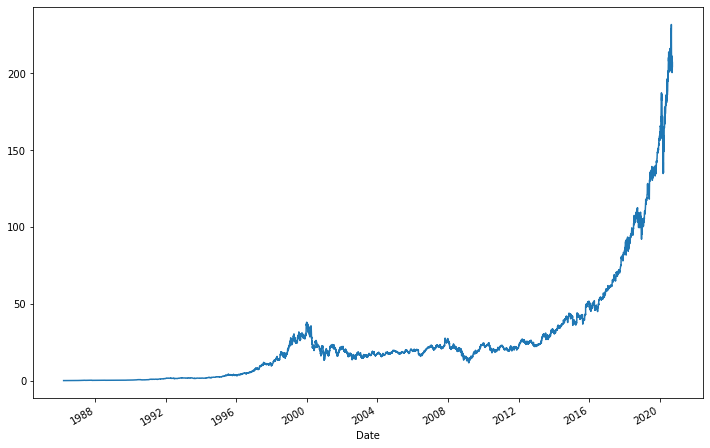

In [11]:
stock_datarame['Close'].plot(figsize=(12,8))

In [12]:
stock_datarame.shape

(8705, 7)

In [13]:
# We are going to take starting 8000 data points for training

train_len = 8000

In [14]:
#Splitting the train-test data

train = stock_datarame.iloc[:train_len]
test = stock_datarame.iloc[train_len:]

In [15]:
len(test)

705

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [37]:
scaled_train[:,3]

array([0.00000000e+00, 0.00000000e+00, 1.22684333e-04, ...,
       9.91657465e-01, 9.92761624e-01, 9.55220218e-01])

In [20]:
# This is the Keras TimeSeriesGenerator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [38]:
# Number of inputs means number of timestamps we are going to consider from the past to predict the future
# We have 7 features including the Closing price to predict
n_input = 14
n_features=7
generator = TimeseriesGenerator(scaled_train, scaled_train[:,3], length=n_input, batch_size=100)

In [41]:
len(generator)

80

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               94800     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 94,951
Trainable params: 94,951
Non-trainable params: 0
_________________________________________________________________


In [45]:
# fit model
model.fit_generator(generator,epochs=30)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
80/80 [==============================] - 2s 29ms/step - loss: 0.0111
Epoch 2/30
80/80 [==============================] - 2s 29ms/step - loss: 1.3206e-04
Epoch 3/30
80/80 [==============================] - 2s 28ms/step - loss: 2.0558e-04
Epoch 4/30
80/80 [==============================] - 2s 29ms/step

In [46]:
model.history.history.keys()

dict_keys(['loss'])

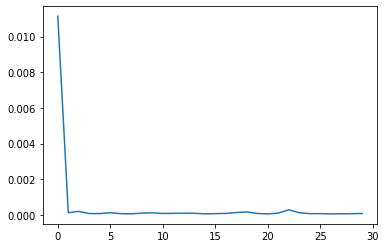

In [47]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [52]:
first_eval_batch = scaled_train[-14:]

In [53]:
first_eval_batch

array([[0.98070068, 0.97559791, 0.98277144, 0.98527788, 0.01602481,
        0.        , 0.        ],
       [0.98537185, 0.97571932, 0.9842588 , 0.97767145, 0.01658995,
        0.13636364, 0.        ],
       [0.98094653, 0.97256283, 0.98723352, 0.98024782, 0.01812441,
        0.        , 0.        ],
       [0.98119238, 0.96904213, 0.97880516, 0.97080113, 0.01920864,
        0.        , 0.        ],
       [0.97271051, 0.96285055, 0.9789291 , 0.97227334, 0.01360972,
        0.        , 0.        ],
       [0.97664413, 0.97741896, 0.98475459, 0.98638204, 0.01839124,
        0.        , 0.        ],
       [0.98955132, 0.97814738, 0.98834903, 0.97914366, 0.01772644,
        0.        , 0.        ],
       [0.9798402 , 0.97268423, 0.98525037, 0.98086124, 0.00497492,
        0.        , 0.        ],
       [0.98340504, 0.97911861, 0.99144769, 0.98809962, 0.01550407,
        0.        , 0.        ],
       [0.99237861, 0.99162316, 1.        , 1.        , 0.01906002,
        0.        , 0. 

In [54]:
first_eval_batch = first_eval_batch.reshape((1, 14, n_features))

In [55]:
model.predict(first_eval_batch)

array([[0.999812]], dtype=float32)

In [102]:
z = scaled_test[1,3]

In [107]:
z = scaled_test[0]
z = z.reshape((1,1,7))

In [108]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
a = scaled_test

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred)
    a[i,3] = current_pred[0]
    b = a[i]
    b = b.reshape((1,1,7))
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],b,axis=1)

In [112]:
len(test_predictions)

705

In [120]:
temp = np.array(test_predictions)
temp.shape

(705, 1)

In [122]:
temp = temp.reshape((705,))

In [123]:
a[:,3] = np.array(temp)

In [124]:
z = scaler.inverse_transform(a)
z

array([[7.8170000e+01, 7.9460000e+01, 7.7820000e+01, ..., 2.6152300e+07,
        0.0000000e+00, 0.0000000e+00],
       [7.8370000e+01, 7.9900000e+01, 7.8260000e+01, ..., 2.6162100e+07,
        0.0000000e+00, 0.0000000e+00],
       [7.9320000e+01, 7.9570000e+01, 7.8800000e+01, ..., 2.3184500e+07,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.9719000e+02, 2.0271000e+02, 1.9638000e+02, ..., 3.9839700e+07,
        0.0000000e+00, 0.0000000e+00],
       [2.0506000e+02, 2.0810000e+02, 2.0208000e+02, ..., 3.3428500e+07,
        0.0000000e+00, 0.0000000e+00],
       [2.0790000e+02, 2.0810000e+02, 2.0370000e+02, ..., 1.3336334e+07,
        0.0000000e+00, 0.0000000e+00]])

In [126]:
true_predictions = z[:,3]
true_predictions

array([ 81.55467669,  81.30602507,  81.17983851,  81.17188535,
        81.47512566,  81.85480764,  82.32558413,  82.71304922,
        82.92442739,  83.16644246,  83.62302279,  83.81728004,
        83.91897553,  84.0227407 ,  84.02879423,  84.04403981,
        84.11757617,  84.21468536,  84.26990565,  84.35588916,
        84.4548834 ,  84.69123361,  85.06641673,  85.41960113,
        85.74488874,  85.87496686,  85.99028524,  86.32143205,
        86.73521982,  87.01989142,  87.37761354,  87.66722125,
        87.9793621 ,  88.53880394,  89.10614549,  89.54405022,
        90.03614527,  90.74573031,  90.93647982,  91.34052168,
        91.80112474,  91.83401594,  91.35307572,  90.41971394,
        90.27381696,  89.64002256,  88.80561615,  88.67642226,
        88.5383764 ,  88.55619692,  88.95292207,  89.55229003,
        89.86101058,  90.23013045,  90.38657983,  90.79864773,
        91.42012129,  92.05416833,  92.41781766,  92.46571152,
        92.20931566,  92.25666538,  92.52523633,  92.57

In [128]:
z = scaler.inverse_transform(scaled_test)
original_values = z[:,3]

In [129]:
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-05,78.17,79.46,77.82,78.41,26152300,0.0,0.0
2017-12-06,78.37,79.90,78.26,79.55,26162100,0.0,0.0
2017-12-07,79.32,79.57,78.80,79.27,23184500,0.0,0.0
2017-12-08,80.37,81.28,80.08,80.88,24489100,0.0,0.0
2017-12-11,81.00,82.04,80.84,81.91,22857900,0.0,0.0
...,...,...,...,...,...,...,...
2020-09-17,200.05,204.33,199.96,202.91,34011300,0.0,0.0
2020-09-18,202.80,203.65,196.25,200.39,55225300,0.0,0.0
2020-09-21,197.19,202.71,196.38,202.54,39839700,0.0,0.0


In [137]:
true_pred_series = pd.Series(true_predictions)
true_pred_series

0       81.554677
1       81.306025
2       81.179839
3       81.171885
4       81.475126
          ...    
700    231.547965
701    229.123734
702    227.214354
703    225.199547
704    225.348485
Length: 705, dtype: float64

In [145]:
test['Open'] = true_predictions
test.head()

/home/aman/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-05,81.554677,79.46,77.82,78.41,26152300,0.0,0.0
2017-12-06,81.306025,79.90,78.26,79.55,26162100,0.0,0.0
2017-12-07,81.179839,79.57,78.80,79.27,23184500,0.0,0.0
2017-12-08,81.171885,81.28,80.08,80.88,24489100,0.0,0.0
2017-12-11,81.475126,82.04,80.84,81.91,22857900,0.0,0.0


In [149]:
test_ = test.drop(['High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis = 1)
test_.rename(columns = {"Open": 'close_pred'}, inplace = True)

In [150]:
test_.head()

,close_pred,Close
Date,,
2017-12-05,81.554677,78.41
2017-12-06,81.306025,79.55
2017-12-07,81.179839,79.27
2017-12-08,81.171885,80.88
2017-12-11,81.475126,81.91


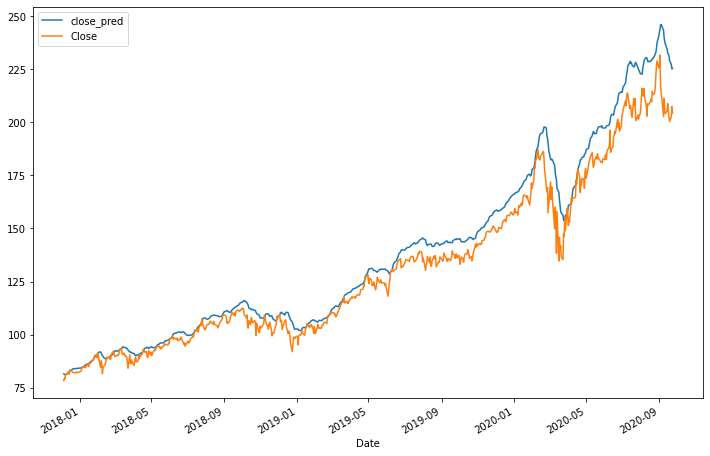

In [151]:
test_.plot(figsize=(12,8))